## Import Data <a name="import"></a>


Import libraries:


In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc, roc_curve, roc_auc_score, accuracy_score, classification_report 

Load the data and store it in dataframe `df`:


In [2]:
# Read in and explore dataset
url = "https://raw.githubusercontent.com/dandersonghub/Case-Study/main/DSCS.csv"
df = pd.read_csv(url)
df.head()

,ProviderStatusGroup,SanctionCount,LocationCount,ProviderTypeIdName,PrimaryPracticeStateIdName,Email1Domain,Email1Root,Email1AddressBounced,PracticeStateCount,ProviderAgeNearestDecade
0,Registered,0,NaN,MD,FL,gmail.com,com,0.0,NaN,40.0
1,Registered,0,NaN,MD,AR,yahoo.com,com,0.0,NaN,40.0
2,Registered,0,NaN,MD,IL,icloud.com,com,0.0,NaN,30.0
3,Registered,0,NaN,MD,NH,hitchcock.org,org,0.0,NaN,50.0
4,Registered,0,NaN,APN,GA,gmail.com,com,0.0,NaN,30.0


In [3]:
# Display df content
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ProviderStatusGroup         1000 non-null   object 
 1   SanctionCount               1000 non-null   int64  
 2   LocationCount               369 non-null    float64
 3   ProviderTypeIdName          938 non-null    object 
 4   PrimaryPracticeStateIdName  938 non-null    object 
 5   Email1Domain                648 non-null    object 
 6   Email1Root                  648 non-null    object 
 7   Email1AddressBounced        648 non-null    float64
 8   PracticeStateCount          369 non-null    float64
 9   ProviderAgeNearestDecade    983 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 78.2+ KB


In [4]:
# View all missing values by column
df.isnull().sum()

ProviderStatusGroup             0
SanctionCount                   0
LocationCount                 631
ProviderTypeIdName             62
PrimaryPracticeStateIdName     62
Email1Domain                  352
Email1Root                    352
Email1AddressBounced          352
PracticeStateCount            631
ProviderAgeNearestDecade       17
dtype: int64

In [5]:
# Descriptive Statistics for Dataframe (numeric columns)
df.describe()

,SanctionCount,LocationCount,Email1AddressBounced,PracticeStateCount,ProviderAgeNearestDecade
count,1000.000000,369.000000,648.000000,369.000000,983.000000
mean,0.030000,2.550136,0.081790,2.550136,42.706002
std,0.301979,4.024153,0.274256,4.024153,12.748629
min,0.000000,1.000000,0.000000,1.000000,20.000000
25%,0.000000,1.000000,0.000000,1.000000,30.000000
50%,0.000000,1.000000,0.000000,1.000000,40.000000
75%,0.000000,2.000000,0.000000,2.000000,50.000000
max,6.000000,39.000000,1.000000,39.000000,80.000000


In [6]:
# Descriptive Statistics for 'Character' Columns
df.describe(include='object')

,ProviderStatusGroup,ProviderTypeIdName,PrimaryPracticeStateIdName,Email1Domain,Email1Root
count,1000,938,938,648,648
unique,2,26,49,284,13
top,Registered,MD,SC,gmail.com,com
freq,500,285,163,210,477


In [7]:
# Check for class imbalance
# None detected
df['ProviderStatusGroup'].value_counts(dropna=False)

Registered      500
Unregistered    500
Name: ProviderStatusGroup, dtype: int64

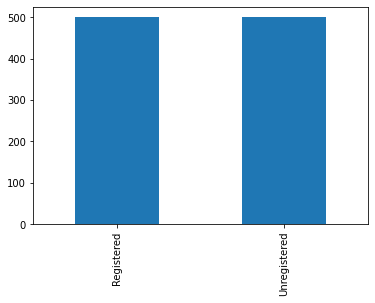

In [8]:
df.ProviderStatusGroup.value_counts().plot(kind='bar');

In [9]:
# Review columns and values 

df['SanctionCount'].value_counts(dropna=False)

0    986
1      6
2      4
3      2
4      1
6      1
Name: SanctionCount, dtype: int64

In [10]:
df['LocationCount'].value_counts (dropna=False)

NaN     631
1.0     221
2.0      73
5.0      15
3.0      15
4.0      15
6.0       7
9.0       4
11.0      4
19.0      3
20.0      2
10.0      2
15.0      2
7.0       1
39.0      1
12.0      1
36.0      1
18.0      1
13.0      1
Name: LocationCount, dtype: int64

In [11]:
df['ProviderTypeIdName'].value_counts(dropna=False)

MD       285
NP       106
PA        63
NaN       62
PT        54
PC        52
DDS       41
CSW       40
DO        32
MFT       32
CRNA      29
APN       29
Other     26
SLP       25
DMD       24
OT        23
PTNL      13
ABA       12
CP         9
DC         9
ACU        9
ADC        8
OD         7
DT         6
AUD        2
DPM        1
NMW        1
Name: ProviderTypeIdName, dtype: int64

In [12]:
df['PrimaryPracticeStateIdName'].value_counts(dropna=False)

SC       163
CA       136
GA        69
NaN       62
CT        58
TX        49
NY        49
CO        48
VA        37
WI        32
FL        30
OH        29
IN        23
NV        21
WA        20
AR        15
MO        11
MN        11
WV        10
KY        10
IA         9
MD         9
OR         9
ME         9
IL         8
NJ         8
MA         6
NC         6
NH         6
DC         5
AZ         5
NM         4
TN         4
NE         3
LA         3
VT         3
PA         3
SD         2
MI         2
HI         2
UT         2
KS         1
DE         1
OK         1
ND         1
MT         1
ID         1
WY         1
AL         1
Other      1
Name: PrimaryPracticeStateIdName, dtype: int64

In [13]:
df['Email1Domain'].value_counts(dropna=False)

NaN                             352
gmail.com                       210
yahoo.com                        45
hotmail.com                      17
aol.com                          12
                               ... 
apexeducationalsolutions.com      1
interlockingconnections.com       1
superiortreatmentcenter.org       1
uky.edu                           1
devrehabpt2.com                   1
Name: Email1Domain, Length: 285, dtype: int64

In [14]:
df['Email1Root'].value_counts(dropna=False)

com           477
NaN           352
org            93
net            33
edu            21
COM            11
us              4
pro             2
ORG             2
co              1
gov             1
health          1
EDU             1
healthcare      1
Name: Email1Root, dtype: int64

In [15]:
df['Email1AddressBounced'].value_counts(dropna=False)

0.0    595
NaN    352
1.0     53
Name: Email1AddressBounced, dtype: int64

In [16]:
df['PracticeStateCount'].value_counts(dropna=False)

NaN     631
1.0     221
2.0      73
5.0      15
3.0      15
4.0      15
6.0       7
9.0       4
11.0      4
19.0      3
20.0      2
10.0      2
15.0      2
7.0       1
39.0      1
12.0      1
36.0      1
18.0      1
13.0      1
Name: PracticeStateCount, dtype: int64

In [17]:
df['ProviderAgeNearestDecade'].value_counts(dropna=False)

40.0    346
30.0    250
50.0    177
60.0    109
70.0     49
20.0     39
NaN      17
80.0     13
Name: ProviderAgeNearestDecade, dtype: int64

In [18]:
pd.crosstab(df['ProviderStatusGroup'], df['Email1AddressBounced'], dropna=False)

Email1AddressBounced,0.0,1.0
ProviderStatusGroup,,
Registered,454,41
Unregistered,141,12


In [19]:
pd.crosstab(df['ProviderStatusGroup'], df['Email1Root'], dropna=False)

Email1Root,COM,EDU,ORG,co,com,edu,gov,health,healthcare,net,org,pro,us
ProviderStatusGroup,,,,,,,,,,,,,
Registered,3,1,0,1,368,17,1,1,0,27,72,1,3
Unregistered,8,0,2,0,109,4,0,0,1,6,21,1,1


In [20]:
pd.set_option('display.max_columns', None)
pd.crosstab(df['ProviderStatusGroup'], df['ProviderTypeIdName'], dropna=False)

ProviderTypeIdName,ABA,ACU,ADC,APN,AUD,CP,CRNA,CSW,DC,DDS,DMD,DO,DPM,DT,MD,MFT,NMW,NP,OD,OT,Other,PA,PC,PT,PTNL,SLP
ProviderStatusGroup,,,,,,,,,,,,,,,,,,,,,,,,,,
Registered,11,8,5,17,1,7,16,34,4,10,12,16,1,1,110,29,1,55,7,17,3,25,48,41,4,17
Unregistered,1,1,3,12,1,2,13,6,5,31,12,16,0,5,175,3,0,51,0,6,23,38,4,13,9,8


In [21]:
pd.crosstab(df['ProviderStatusGroup'], df['Email1Root'], dropna=False)

Email1Root,COM,EDU,ORG,co,com,edu,gov,health,healthcare,net,org,pro,us
ProviderStatusGroup,,,,,,,,,,,,,
Registered,3,1,0,1,368,17,1,1,0,27,72,1,3
Unregistered,8,0,2,0,109,4,0,0,1,6,21,1,1


In [22]:
pd.crosstab(df['ProviderStatusGroup'], df['SanctionCount'], dropna=False)

SanctionCount,0,1,2,3,4,6
ProviderStatusGroup,,,,,,
Registered,493,0,3,2,1,1
Unregistered,493,6,1,0,0,0


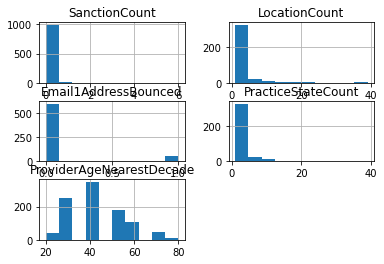

In [23]:
#Plot histograms of numerical variables
viz = df
viz.hist()
plt.show()

In [24]:
# Recode categorical columns to collapse low frequency categories into new 'Other' column and more

df["ProviderStatusGroup"] = df.ProviderStatusGroup.replace ({'Registered':1, 'Unregistered':0})

df["Email1AddressBounced"] = df.Email1AddressBounced.replace ({0.0:'No', 1.0:'Yes'})

df["SanctionCount"] = df.SanctionCount.replace ({0:'0', 1:'1',2:'1', 3:'1', 4:'1', 6:'1'})

df["LocationCount"] = df.LocationCount.replace ({1.0:'1', 2.0:'2', 3.0:'2', 4.0:'2', 5.0:'2', 6.0:'2', 9.0:'2', 11.0:'2', 19.0:'2', 20.0:'2', 
                                                 10.0:'2', 15.0:'2', 7.0:'2', 39.0:'2', 12.0:'2', 36.0:'2', 18.0:'2', 13.0:'2'})

df["ProviderTypeIdName"].replace ({'PT':'Other','PC':'Other','DDS':'Other','CSW':'Other','DO':'Other','MFT':'Other','CRNA':'Other',
                                   'APN':'Other','SLP':'Other','DMD':'Other','OT':'Other','PTNL':'Other','ABA':'Other','CP':'Other',
                                   'DC':'Other','ACU':'Other','ADC':'Other','OD':'Other','DT':'Other','AUD':'Other','DPM':'Other','NMW':'Other'}, inplace=True)

df["PrimaryPracticeStateIdName"].replace ({'VA':'Other','WI':'Other','FL':'Other','OH':'Other','IN':'Other','NV':'Other','WA':'Other',
                                   'AR':'Other','MO':'Other','MN':'Other','WV':'Other','KY':'Other','IA':'Other','MD':'Other',
                                   'OR':'Other','ME':'Other','IL':'Other','NJ':'Other','MA':'Other','NC':'Other','NH':'Other','DC':'Other','AZ':'Other','NM':'Other',
                                   'TN':'Other','NE':'Other','LA':'Other','VT':'Other','PA':'Other','SD':'Other','MI':'Other','HI':'Other','UT':'Other','KS':'Other',
                                   'DE':'Other','OK':'Other','ND':'Other','MT':'Other','ID':'Other','WY':'Other','AL':'Other'}, inplace=True)


# Replace missings in "" column with most frequent value (40.0)

df["ProviderAgeNearestDecade"].replace(np.nan, 40.0, inplace=True)

df["Email1Root"].replace ({'org':'Other','net':'Other','edu':'Other','COM':'com','us':'Other','pro':'Other','ORG':'Other',
                                   'co':'Other','gov':'Other','health':'Other','EDU':'Other','healthcare':'Other'}, inplace=True)


# Drop all columns below not included in model

# Email1Domanin column has 284 unique values with similar info compared to Email1Root, drop 
# Columns "LocationCount" and "PracticeStateCount" are exactly the same, drop one
df.drop(columns=['Email1Domain','PracticeStateCount'], inplace=True)

# filling with Unknown class
df= df.fillna("missing")


In [25]:
# Check for missing data after recoding 
df.isnull().sum()

ProviderStatusGroup           0
SanctionCount                 0
LocationCount                 0
ProviderTypeIdName            0
PrimaryPracticeStateIdName    0
Email1Root                    0
Email1AddressBounced          0
ProviderAgeNearestDecade      0
dtype: int64

In [26]:
# Pre-processing prior to modeling (Normalizing age variable)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
col = ['ProviderAgeNearestDecade']
df[col] = scaler.fit_transform(df[col])

df.head()

,ProviderStatusGroup,SanctionCount,LocationCount,ProviderTypeIdName,PrimaryPracticeStateIdName,Email1Root,Email1AddressBounced,ProviderAgeNearestDecade
0,1,0,missing,MD,Other,com,No,-0.210473
1,1,0,missing,MD,Other,com,No,-0.210473
2,1,0,missing,MD,Other,com,No,-1.001724
3,1,0,missing,MD,Other,Other,No,0.580778
4,1,0,missing,Other,GA,com,No,-1.001724


In [27]:
# Encoding Categorical Columns and creating new dataset for modeling 

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
cat_cols = ['SanctionCount','LocationCount','ProviderTypeIdName','PrimaryPracticeStateIdName','Email1Root','Email1AddressBounced']

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df[cat_cols]))
df_encoded.columns = encoder.get_feature_names(cat_cols)

# Replace Categotical Data with Encoded Data
df = df.drop(cat_cols ,axis=1)
df = pd.concat([df_encoded, df], axis=1)

print('Shape of dataframe:', df.shape)
df.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Shape of dataframe: (1000, 27)


,SanctionCount_0,SanctionCount_1,LocationCount_1,LocationCount_2,LocationCount_missing,ProviderTypeIdName_MD,ProviderTypeIdName_NP,ProviderTypeIdName_Other,ProviderTypeIdName_PA,ProviderTypeIdName_missing,PrimaryPracticeStateIdName_CA,PrimaryPracticeStateIdName_CO,PrimaryPracticeStateIdName_CT,PrimaryPracticeStateIdName_GA,PrimaryPracticeStateIdName_NY,PrimaryPracticeStateIdName_Other,PrimaryPracticeStateIdName_SC,PrimaryPracticeStateIdName_TX,PrimaryPracticeStateIdName_missing,Email1Root_Other,Email1Root_com,Email1Root_missing,Email1AddressBounced_No,Email1AddressBounced_Yes,Email1AddressBounced_missing,ProviderStatusGroup,ProviderAgeNearestDecade
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,-0.210473
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,-0.210473
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,-1.001724
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0.580778
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,-1.001724


In [28]:
# Put all independent variables into array for modeling 

X = np.asarray(df.loc[ : , df.columns != 'ProviderStatusGroup'])

X[0:5]

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        -0.21047281],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        -0.21047281],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       

In [29]:
# Create array for outcome (dependent) variable Registered = 1, Unregistered =0

y = np.asarray(df['ProviderStatusGroup'])
y[0:5]


array([1, 1, 1, 1, 1])

In [30]:
X.shape

(1000, 26)

In [31]:
y.shape

(1000,)

#Test/Train Split

In [32]:
# Split data into test and train datasets to feed into Classification model
# Testing set is 20%, Training 80%
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (800, 26) (800,)
Test set: (200, 26) (200,)


In [33]:
X_train

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.21047281],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -1.00172399],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.58077836],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.        , -0.21047281],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.        , -0.21047281],
       [ 1.        ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.58077836]])

Logistic Regression Model (Test Model)

In [34]:
# Create model and tune parameters
# Add custom weights in order to account for imbalanced data
# C default is C=1.0 (C=0.1 performs better due to regularization)
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.1, solver='lbfgs',random_state=0).fit(X_train,y_train)
LR

LogisticRegression(C=0.1, random_state=0)

In [35]:
# Obtain test predictions 
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1])

In [36]:
yhat.shape

(200,)

In [37]:
# Get yhat prediction counts
pd.value_counts(yhat)

0    113
1     87
dtype: int64

Returns probability estimates for provider status. The first column are Unregistered (0), and the second column are Registered (1). 

In [38]:
# Obtain probability predictions for test data
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.93485373, 0.06514627],
       [0.94673821, 0.05326179],
       [0.93419334, 0.06580666],
       [0.96377021, 0.03622979],
       [0.44927027, 0.55072973],
       [0.9638079 , 0.0361921 ],
       [0.9638079 , 0.0361921 ],
       [0.92265898, 0.07734102],
       [0.96859644, 0.03140356],
       [0.45249553, 0.54750447],
       [0.59850971, 0.40149029],
       [0.05257431, 0.94742569],
       [0.94974492, 0.05025508],
       [0.93615605, 0.06384395],
       [0.9643182 , 0.0356818 ],
       [0.95990048, 0.04009952],
       [0.50247352, 0.49752648],
       [0.9643182 , 0.0356818 ],
       [0.93485373, 0.06514627],
       [0.05011566, 0.94988434],
       [0.95337966, 0.04662034],
       [0.04948421, 0.95051579],
       [0.05257431, 0.94742569],
       [0.94402407, 0.05597593],
       [0.0531145 , 0.9468855 ],
       [0.05257431, 0.94742569],
       [0.04148429, 0.95851571],
       [0.95432972, 0.04567028],
       [0.96356799, 0.03643201],
       [0.96339147, 0.03660853],
       [0.

In [39]:
yhat_prob.shape

(200, 2)

## Confusion Matrix 

In [40]:
# Classification Matrix Configuration and Plot

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[81 15]
 [ 6 98]]


Confusion matrix, without normalization
[[81 15]
 [ 6 98]]


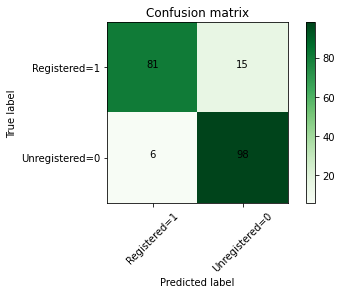

In [41]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Registered=1','Unregistered=0'],normalize= False,  title='Confusion matrix')

In [42]:
tn, fp, fn, tp = cnf_matrix.ravel()
s = """
True Negatives: {3}
False Positives {2}
False Negatives {1}
True Positives {0}
""".format(tn, fp, fn, tp)

print(s)


True Negatives: 98
False Positives 6
False Negatives 15
True Positives 81



The confusion matrix visually displays the binary classifier's ability to correctly predict the classes (1=Registered, 0=Unregistered). Out of 200 test providers, the classifier correctly predicted 81 as 1 but incorrectly predicted 15 as 0. The classifier correctly predicted 98 as 0, and 6 of them incorrectly as 1.

## Model Accuracy Evaluation <a name="mae"></a>

## Classification Report 

The metrics below can be used to help understand how well our model is able to predict provider status.

$Precision$ = $Positive$ $Predictive$ $Value$ = $\frac{TP}{TP + FP}$

$Recall$ = $Sensitivity$ = $True$ $Positive$ $Rate$ = $\frac{TP}{TP + FN}$

$Accuracy$ =  $\frac{TP + TN}{TP + TN + FP + FN}$

$F1-Score$ = Average of Precision and Recall, the closer to 1, the better the model.  

In [43]:
print (classification_report(y_test, yhat, target_names=['Unregistered', 'Registered']))

              precision    recall  f1-score   support

Unregistered       0.87      0.94      0.90       104
  Registered       0.93      0.84      0.89        96

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.90      0.89       200



**Precision:** Out of all the people that the model predicted would be a registered, 93% were.

**Recall:** Out of all the providers who were true registered, the model  predicted this outcome correctly for 84% of those people.

**F1-score:** A registered F1-score of 0.89 tells us that the model does a good job of predicting provider status. 

The accuracy for this logistic regression classifier is 90%. 

## ROC/AUC

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


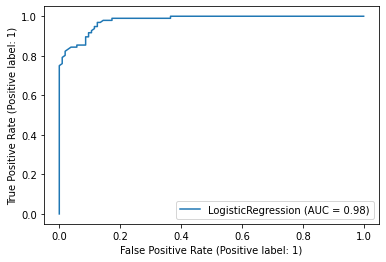

In [44]:
# Plot ROC/AUC (visualizes model performance)
# Percentage of correct predictions

from sklearn.metrics._plot.roc_curve import plot_roc_curve
disp = plot_roc_curve(LR, X_test, y_test)

#Classification Model Comparison 

In [45]:
# Evaluation metrics for classification models

def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

Logistic Regression Model

In [46]:
from sklearn.linear_model import LogisticRegression

# Building Logistic Regression model 
clf =LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# Evaluate Model
clf_eval = evaluate_model(clf, X_test, y_test)

# Print result
print(clf)
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])

LogisticRegression(random_state=0)
Accuracy: 0.88
Precision: 0.9615384615384616
Recall: 0.78125
F1 Score: 0.8620689655172413
Cohens Kappa Score: 0.7578692493946732
Area Under Curve: 0.9813701923076923
Confusion Matrix:
 [[101   3]
 [ 21  75]]


Decision Tree Model

In [47]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.89
Precision: 0.9021739130434783
Recall: 0.8645833333333334
F1 Score: 0.8829787234042554
Cohens Kappa Score: 0.7792937399678973
Area Under Curve: 0.9371494391025642
Confusion Matrix:
 [[95  9]
 [13 83]]


Random Forrest Model 

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.885
Precision: 0.8686868686868687
Recall: 0.8958333333333334
F1 Score: 0.8820512820512821
Cohens Kappa Score: 0.7699079631852741
Area Under Curve: 0.9749599358974359
Confusion Matrix:
 [[91 13]
 [10 86]]


Gradient Boosted Machine

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

# Building Gradient Boosting Machine model 
gbm = GradientBoostingClassifier(random_state=0)
gbm.fit(X_train, y_train)

# Evaluate Model
gbm_eval = evaluate_model(gbm, X_test, y_test)

# Print result
print('Accuracy:', gbm_eval['acc'])
print('Precision:', gbm_eval['prec'])
print('Recall:', gbm_eval['rec'])
print('F1 Score:', gbm_eval['f1'])
print('Cohens Kappa Score:', gbm_eval['kappa'])
print('Area Under Curve:', gbm_eval['auc'])
print('Confusion Matrix:\n', gbm_eval['cm'])

Accuracy: 0.9
Precision: 0.9318181818181818
Recall: 0.8541666666666666
F1 Score: 0.8913043478260869
Cohens Kappa Score: 0.7990353697749196
Area Under Curve: 0.9733072916666667
Confusion Matrix:
 [[98  6]
 [14 82]]


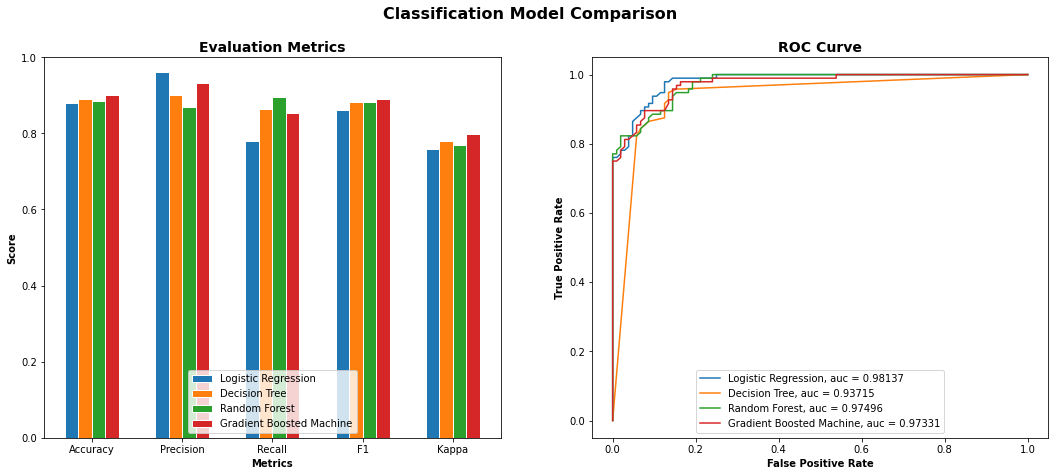

In [50]:
# Plot 4 Classification Models and Compare Results

# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Classification Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(18)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.15
clf_score = [clf_eval['acc'], clf_eval['prec'], clf_eval['rec'], clf_eval['f1'], clf_eval['kappa']]
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
gbm_score = [gbm_eval['acc'], gbm_eval['prec'], gbm_eval['rec'], gbm_eval['f1'], gbm_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(clf_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r1, clf_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r2, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r3, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r4, gbm_score, width=barWidth, edgecolor='white', label='Gradient Boosted Machine')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(clf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend(loc=8)

# Second plot
## Comparing ROC Curve
ax2.plot(clf_eval['fpr'], clf_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(clf_eval['auc']))
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(gbm_eval['fpr'], gbm_eval['tpr'], label='Gradient Boosted Machine, auc = {:0.5f}'.format(gbm_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=8)

plt.show()

In [51]:
#@title Default title text
# Plot feature importances 

importances = gbm.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = df.columns

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%s : (%f)" % (feature_names[f] , importances[indices[f]]))

Feature ranking:
SanctionCount_0 : (0.774394)
SanctionCount_1 : (0.093510)
LocationCount_1 : (0.065010)
LocationCount_2 : (0.014696)
LocationCount_missing : (0.010320)
ProviderTypeIdName_MD : (0.005737)
ProviderTypeIdName_NP : (0.004589)
ProviderTypeIdName_Other : (0.004497)
ProviderTypeIdName_PA : (0.004347)
ProviderTypeIdName_missing : (0.003592)
PrimaryPracticeStateIdName_CA : (0.003353)
PrimaryPracticeStateIdName_CO : (0.002765)
PrimaryPracticeStateIdName_CT : (0.002464)
PrimaryPracticeStateIdName_GA : (0.001914)
PrimaryPracticeStateIdName_NY : (0.001580)
PrimaryPracticeStateIdName_Other : (0.001482)
PrimaryPracticeStateIdName_SC : (0.001284)
PrimaryPracticeStateIdName_TX : (0.001049)
PrimaryPracticeStateIdName_missing : (0.001041)
Email1Root_Other : (0.000954)
Email1Root_com : (0.000549)
Email1Root_missing : (0.000524)
Email1AddressBounced_No : (0.000291)
Email1AddressBounced_Yes : (0.000057)
Email1AddressBounced_missing : (0.000000)
ProviderStatusGroup : (0.000000)


Text(0.5, 0, 'index of the feature')

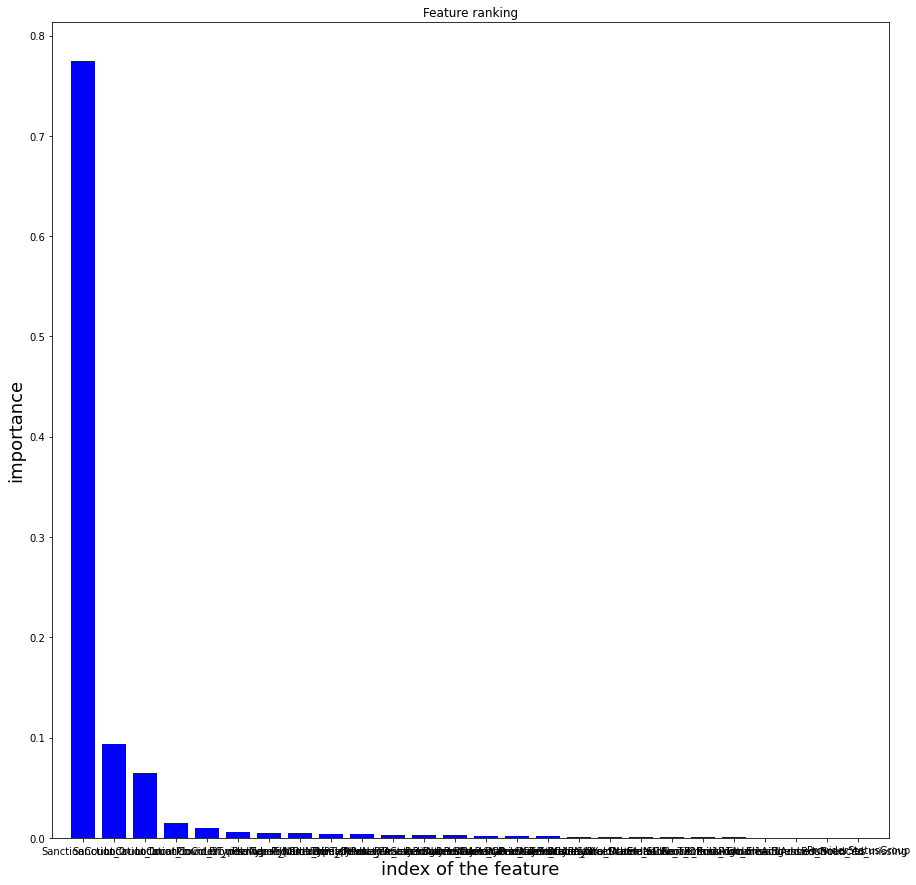

In [52]:
f, ax = plt.subplots(figsize=(15, 15))
plt.title("Feature ranking", fontsize = 12)
plt.bar(range(X.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(X.shape[1]), feature_names)
plt.xlim([-1, X.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)